In [1]:
import pandas as pd
import numpy as np
from pymongo import MongoClient

from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from bdd import ConnexionMongoDB

conn = ConnexionMongoDB()
data = conn.labelsWithUserData()

/Users/laurepeng/Desktop/COURS/ISI/ISI3 - P24/IF29/Projet/IF29_project/bdd.py:142: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['created_at'])
/Users/laurepeng/Desktop/COURS/ISI/ISI3 - P24/IF29/Projet/IF29_project/bdd.py:143: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tweet_created_at'] = pd.to_datetime(df['tweet_created_at'])


In [3]:
X = data.drop('label', axis=1)  # Features
y = data['label']  # Target variable

# Print features and target variables to verify
print("Features (X):")
print(X)
print("\nTarget (y):")
print(y)

Features (X):
      friends_count  default_profile_image  favourites_count    created_at  \
0              2393                      0              2878  1.256942e+09   
1              1697                      0              1116  1.316414e+09   
2               290                      0               115  1.383883e+09   
3                67                      0               216  1.519296e+09   
4                85                      0              1025  1.523732e+09   
...             ...                    ...               ...           ...   
1497           1256                      0               355  1.274043e+09   
1498           1881                      0            115277  1.378177e+09   
1499            208                      0               497  1.311865e+09   
1500           3330                      0             23650  1.303559e+09   
1501           1552                      0               888  1.234093e+09   

      verified  url  statuses_count  followers_co

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # 70% training and 30% test

svm = SVC(C=10, decision_function_shape='ovr', kernel='rbf')

# Train the model using the training sets
svm.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = svm.predict(X_test)

In [5]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9623059866962306


In [6]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[434,   0],
       [ 17,   0]])

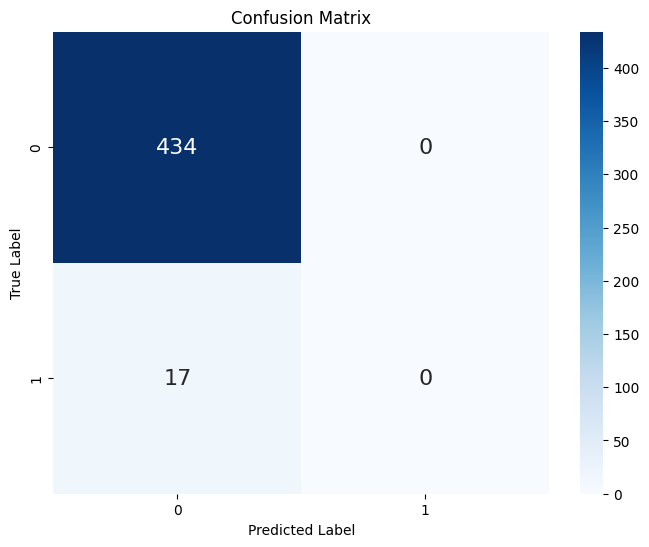

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()